In [1]:
import os
import copy as cp
import sys
import numpy as np
import importlib
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from matplotlib.patches import Rectangle
import pandas
import scipy.stats

In [2]:
sys.path.insert(1, '../code/')

from plot_functions import make_fpr_figure_individual, make_fpr_figure_four
from format_helper_functions import find_mutation, make_aa_dict
from mochi_functions import process_mochi, find_mochi_alpha

In [3]:
plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = 'Arial'
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Arial"] + plt.rcParams["font.serif"]

In [4]:
# whether to save the plots or not
save = True

# input directory for all of the simulations
indir = '../results/simulations/'
seeds = ['111','222','333','444','777','888']
labels = ['unif.','unif. low','read var.', 'non-spec.', 'GB1 high', 'GB1 low']

# number of simulation scenarios
nsims   = len (seeds)
protein = 'sim'
mochi   = True

# if to read in data for mochi
if mochi :
    mochi_seeds = ['777','888']
    mochi_idxs  = [4, 5]

# output directory
outdir  = os.path.join (indir, 'plots')
datadir = indir
if not os.path.isdir (outdir) :
    os.makedirs (outdir)
    
# significance threshold
alpha = 0.1

In [5]:
# distance matrix
Dist = np.loadtxt ('../data/GB1/GB1_distance_matrix.txt')
Df   = Dist[1:,1:]

In [6]:
if mochi :
    mochi_list = list ()
    for i in mochi_seeds :
        mochi_list.append ( pandas.read_table ( os.path.join (indir, i, 'mochi_sigmoid.txt'), low_memory=False))        

In [7]:
# read in data for simulations
n0_doub_list = list ()
n1_doub_list = list ()
n0_sing_list = list ()
n1_sing_list = list ()
y_sing_list  = list ()
y_doub_list  = list ()
pval_list    = list ()
dmat_list    = list ()
rmat_list    = list ()
lambda_d_list = list ()
lambda_s_list = list ()
for i in seeds :
    n0_doub_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_D_neutral.txt')))
    n1_doub_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_D_selection.txt')))
    n0_sing_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_S_neutral.txt')))
    n1_sing_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_S_selection.txt')))
    y_sing_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_Y_singles.txt')))
    y_doub_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_Y_doubles.txt')))
    pval_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_P.txt'))) 

    dmat_i = np.loadtxt ( os.path.join (indir, i, protein + '_Dmat.txt') )
    dmat_list.append (dmat_i + np.transpose (dmat_i))
    rmat_list.append (np.loadtxt ( os.path.join (indir, i, protein + '_Rmat.txt')))
    
    lambda_d_list.append (np.loadtxt ( os.path.join (indir, i, 'lambda_doubles_epistasis.txt')) )
    lambda_s_list.append (np.loadtxt ( os.path.join (indir, i, 'sampled_single_lambdas.txt')))

In [8]:
# dimensions
L    = len (y_sing_list[0])
nAA  = 20
npos = int (L / nAA)

In [9]:
# compute the interaction matrix from the lambda doubles and singles
imat_list = list ()

for j in range (len (seeds)) :       
    # get double mutation lambda values
    bigS  = np.reshape (np.repeat (lambda_s_list[j], L), (L,L))
    bigS += np.transpose (np.reshape (np.repeat (lambda_s_list[j], L), (L,L)) )

    # set values to missing along diagonal; wt should already be missing
    for i in range (npos) :
        bigS[i*nAA:(i*nAA + nAA),:][:,i*nAA:(i*nAA + nAA)] = np.nan
        
    imat_list.append (lambda_d_list[j] - bigS)
    imat_list[j][np.isclose (imat_list[j], 0)] = 0 

In [10]:
if mochi :
    pval_mochi_list = list ()
    res_mochi_list  = list ()
    for i in range (len (mochi_list)) :
        pvals_i, residuals_i, Ydm, Yestm = process_mochi (mochi_list[i], nmuts=L)
        pval_mochi_list.append (cp.deepcopy (pvals_i))
        res_mochi_list.append (cp.deepcopy (residuals_i))

0.9494114058984866
0.8595250408638067


In [11]:
for i in [0] :
    make_fpr_figure_individual (pval_list[i], imat_list[i], dmat_list[i], ithres=0,
                                ys=y_sing_list[i], ls=y_sing_list[i],
                                ybinsize=75, lbinsize=75,
                                outlabel=seeds[i], outdir=outdir,
                                alpha=alpha, save=save, simulation=True, colorbar=True,
                                llabel=r'$\hat Y_i$', ylabel=r'$\hat Y_j$',
                                figsize=(1.1,1.1))

(1100, 1100)
171940
171940
171940
None
0.09195402298850575
power:
0.8540925266903915
0.05585424133811231


In [12]:
for i in range (nsims) :
    make_fpr_figure_four (pval_list[i], imat_list[i], dmat_list[i], ithres=0,
                                ys=y_sing_list[i], ls=y_sing_list[i],
                                ybinsize=75, lbinsize=75,
                                outlabel=seeds[i], outdir=outdir,
                                alpha=alpha, save=save, simulation=True, colorbar=True,
                                llabel=r'$\hat Y_i$', ylabel=r'$\hat Y_j$',
                                figsize=(2.25,2.))

(1100, 1100)
None
0.09195402298850575
power:
0.8540925266903915
0.05585424133811231
(1100, 1100)
None
0.08927130949179887
power:
0.6597582037996546
0.0677671589921807
(1100, 1100)
None
0.09071447685309071
power:
0.5790349417637272
0.07374461979913917
(1100, 1100)
None
0.08827475181110812
power:
0.8422876949740035
0.05985489721886336
(1100, 1100)
None
0.15170704845814978
power:
0.5959079283887468
0.04753648316717237
(1100, 1100)
None
0.1583880037488285
power:
0.35526315789473684
0.06776556776556776


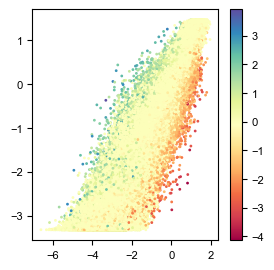

In [13]:
if mochi :
    plt.rcParams["figure.figsize"] = (3,3)

    plt.scatter (Ydm[np.triu_indices (L, k=1)], Yestm[np.triu_indices (L, k=1)],
                 c=imat_list[-1][np.triu_indices (L, k=1)],
                 cmap='Spectral', s=1)
    plt.colorbar ()
    plt.show ()

In [14]:
for i in range (nsims) :
    make_fpr_figure_individual (pval_list[i], imat_list[i], dmat_list[i], ithres=0,
                                ys=y_sing_list[i], ls=y_sing_list[i],
                                ybinsize=75, lbinsize=75,
                                fpmax=0.1, powermax=[1,1,1,1,1,.46][i],#powermax=0.2345,
                                outlabel=seeds[i], outdir=outdir,
                                alpha=alpha, save=save, simulation=True, colorbar=True,
                                llabel=r'$\hat Y_j$', ylabel=r'$\hat Y_i$',
                                figsize=(1.1,1.1))

(1100, 1100)
171940
171940
171940
None
0.09195402298850575
power:
0.8540925266903915
0.05585424133811231
(1100, 1100)
150196
150196
150196
None
0.08927130949179887
power:
0.6597582037996546
0.0677671589921807
(1100, 1100)
143480
143480
143480
None
0.09071447685309071
power:
0.5790349417637272
0.07374461979913917
(1100, 1100)
171940
171940
171940
None
0.08827475181110812
power:
0.8422876949740035
0.05985489721886336
(1100, 1100)
143652
143652
143652
None
0.15170704845814978
power:
0.5959079283887468
0.04753648316717237
(1100, 1100)
288628
288628
288628
None
0.1583880037488285
power:
0.35526315789473684
0.06776556776556776


In [15]:
 if mochi :
    mochi_thresholds = np.zeros (len (pval_mochi_list))
    for i in range (len (mochi_idxs)) :
        idx = mochi_idxs[i]

        # find corresponding mochi threshold
        mochi_thresholds[i] = find_mochi_alpha (pval_list[idx], pval_mochi_list[i], imat_list[idx],
                                                alpha_sig=alpha)

        print (mochi_thresholds)
        make_fpr_figure_individual (pval_mochi_list[i], imat_list[idx],
                                    res_mochi_list[i], ithres=0,
                                    ys=y_sing_list[idx], ls=y_sing_list[idx], outlabel='mochi_' + str(i),
                                    ybinsize=75, lbinsize=75,
                                    fpmax=0.1, powermax=[1.,.5][i], #powermax=1,#powermax=0.2345,
                                    outdir=outdir,
                                    alpha=mochi_thresholds[i], save=save, simulation=True,
                                    labelcolor=True, colorbar=True,
                                    llabel=r'$\hat Y_j$', ylabel=r'$\hat Y_i$',
                                    figsize=(1.1,1.1))
        
        
        make_fpr_figure_four (pval_mochi_list[i], imat_list[idx],
                                    res_mochi_list[i], ithres=0,
                                    ys=y_sing_list[idx], ls=y_sing_list[idx], outlabel='mochi_' + str(i),
                                    ybinsize=75, lbinsize=75,
                                    outdir=outdir,
                                    alpha=mochi_thresholds[i], save=save, simulation=True,
                                    labelcolor=True, colorbar=True,
                                    llabel=r'$\hat Y_j$', ylabel=r'$\hat Y_i$',
                                    figsize=(2.25,2))

[0.02873813 0.        ]
(1100, 1100)
143652
143652
143652
None
0.15170704845814978
power:
0.7769230769230769
0.0519311911716975
(1100, 1100)
None
0.15170704845814978
power:
0.7769230769230769
0.0519311911716975
[0.02873813 0.05871766]
(1100, 1100)
288628
288628
288628
None
0.1583880037488285
power:
0.46382978723404256
0.054384772263766146
(1100, 1100)
None
0.1583880037488285
power:
0.46382978723404256
0.054384772263766146


In [16]:
if mochi :
    mochi_thresholds = np.zeros (len (pval_mochi_list))
    for i in range (len (mochi_list)) :
        idx = mochi_idxs[i]

        mochi_thresholds[i] = find_mochi_alpha (pval_list[idx], pval_mochi_list[i], imat_list[idx],
                                                alpha_sig=alpha)
        print (mochi_thresholds)

        make_fpr_figure_individual (pval_mochi_list[i], imat_list[idx],
                                    res_mochi_list[i], ithres=0,
                                    ys=y_sing_list[idx], ls=y_sing_list[idx],
                                    outlabel='mochi_not_shared_' + str(i),
                                    ybinsize=75, lbinsize=75, outdir=outdir,
                                    alpha=mochi_thresholds[i], save=save, simulation=True, colorbar=True,
                                    llabel=r'$\hat Y_j$', ylabel=r'$\hat Y_i$',
                                    figsize=(1.1,1.1))

[0.02873813 0.        ]
(1100, 1100)
143652
143652
143652
None
0.15170704845814978
power:
0.7769230769230769
0.0519311911716975
[0.02873813 0.05871766]
(1100, 1100)
288628
288628
288628
None
0.1583880037488285
power:
0.46382978723404256
0.054384772263766146


In [17]:
labels.append ('D+M GB1 high')
labels.append ('D+M GB1 low')

In [18]:
plt.rcParams["figure.figsize"] = (3,3.5)

fig, axs = plt.subplots (4, 2, sharex=True, sharey='row', constrained_layout=True)

bins = np.linspace (0,1,20)
if mochi :
    rangeval = nsims + len (mochi_list)
else :
    rangeval = nsims

for si in range (rangeval) :    
    
    if si < nsims :
        Pvals_cp = cp.deepcopy (pval_list[si])
        bigImat  = cp.deepcopy (imat_list[si])
    if si >= nsims :     
        Pvals_cp = cp.deepcopy (pval_mochi_list[si-nsims])
        bigImat  = cp.deepcopy (imat_list[mochi_idxs[si-nsims]])
        
    Pvals_cp[np.tril_indices (L, k=-1)] = np.nan

    cow = axs[int (si / 2), si % 2].hist ([Pvals_cp[np.abs (bigImat) > 0], Pvals_cp[np.abs (bigImat) == 0]],
                                          stacked=True, bins=bins,
                                          color=['darkgray','lightgray'],
                                          label=[r'$|\lambda_{ij}| > 0$',r'$|\lambda_{ij}| = 0$'],
                                          edgecolor='black', linewidth=.05)
    axs[int (si / 2), si % 2].set_xticks ( np.linspace (0,1,3), np.linspace (0,1,3))
    if np.max (cow[0]) > 40000 :
        mult = 3
    else :
        mult = 2
    
    axs[int (si / 2), si % 2].set_title (labels[si])
    axs[int (si / 2), si % 2].set_yticks ( np.arange (0,np.max (cow[0]), mult*int (1e4)), 
                                           np.arange (0,int (np.max (cow[0])/1e4)+1, mult))
    axs[int (si / 2), si % 2].tick_params (length=2, labelsize=6, pad=1)
    axs[int (si / 2), 0].set_ylabel (r'Count $\times 10^4$', labelpad=1, fontsize=8)

for i in range (2) :    
    axs[-1, i].set_xlabel ('$p$-value', labelpad=2)
if save :
    plt.savefig (os.path.join (outdir, 'phists.pdf'),
                 format='pdf', transparent=True, bbox_inches='tight', dpi=600)
    plt.close ()
else :
    plt.show ()

In [19]:
bs_d = 200
for idx in range (nsims) :
    nvals   = np.sum (~np.isnan (y_sing_list[idx]))
    nbins_d = int (nvals / bs_d)

    Pval_cp    = cp.deepcopy (pval_list[idx])
    bigImat_cp = cp.deepcopy (imat_list[idx])
    y_cp       = cp.deepcopy (y_sing_list[idx])
    
    Pval_sort    = Pval_cp[np.argsort (y_cp),:][:,np.argsort (y_cp)]
    bigImat_sort = bigImat_cp[np.argsort (y_cp),:][:,np.argsort (y_cp)]
    
    Pval_nopos = cp.deepcopy (Pval_sort)
    Pval_nopos[np.abs (bigImat_sort) > 0] = np.nan
    Pval_pos = cp.deepcopy (Pval_sort)
    Pval_pos[np.abs (bigImat_sort) == 0] = np.nan

    pval_dict = dict ()
    pval_pos  = dict ()
    for i in range (nbins_d) :
        for j in range (i,nbins_d) :
            pval_dict[(i,j)] = cp.deepcopy (np.ndarray.flatten (Pval_nopos[i*bs_d:(i+1)*bs_d,:][:,j*bs_d:(j+1)*bs_d]))
            pval_pos[(i,j)]  = cp.deepcopy (np.ndarray.flatten (Pval_pos[i*bs_d:(i+1)*bs_d,:][:,j*bs_d:(j+1)*bs_d]))


    plt.rcParams["figure.figsize"] = (6,6)

    bins = np.linspace (0,1,15)

    fig, axs = plt.subplots (nbins_d, nbins_d, sharex=True, sharey=True)
    for i in range (nbins_d) :
        axs[i,0].set_ylabel ('Count')
        axs[-1,i].set_xlabel (r'$p$-value')
        axs[0,i].set_title (r'$Y_i$ bin ' + str (i), fontsize=12)
        for j in range (i,nbins_d) :
            axs[i,j].hist (pval_dict[(i,j)], color='gray', bins=bins, edgecolor='black', linewidth=0.01,
                           label=r'$\lambda_{ij} = 0$', density=True)
            axs[j,i].hist (pval_pos[(i,j)], color='darkgray', alpha=0.75, bins=bins,
                           edgecolor='black', linewidth=0.01,  label=r'$|\lambda_{ij}| > 0$', density=True)

            if i == 0 and j == 0 :
                axs[j,i].legend (frameon=False, fontsize=8, handlelength=1)
                                 #bbox_to_anchor=(7,0))
            #axs[i,j].set_title ((i,j))

    if save :
        plt.savefig (os.path.join (outdir, 'sim_' + str (idx) + '_pvalue_bin_hists.pdf'), bbox_inches='tight')
        plt.close ()
    else :
        plt.show ()

In [20]:
if mochi :
    mid = -1
    
    rank_mochi = scipy.stats.rankdata (pval_mochi_list[mid][np.tril_indices (L, k=-1)], nan_policy='omit')
    rank_randr = scipy.stats.rankdata (pval_list[mochi_idxs[mid]][np.tril_indices (L, k=-1)], nan_policy='omit')
    rank_mochi[np.logical_or (np.isnan (rank_mochi), np.isnan (rank_randr))] = np.nan
    rank_randr[np.logical_or (np.isnan (rank_mochi), np.isnan (rank_randr))] = np.nan

In [21]:
if mochi :
    for i in range (len (mochi_idxs)) :  
        vals_m = cp.deepcopy (pval_mochi_list[i][np.tril_indices (L, k=-1)])
        vals_r = cp.deepcopy (pval_list[mochi_idxs[i]][np.tril_indices (L, k=-1)])
        print (scipy.stats.spearmanr (vals_m, vals_r, nan_policy='omit'))

SignificanceResult(statistic=0.7516454306495425, pvalue=0.0)
SignificanceResult(statistic=0.7450919519327097, pvalue=0.0)


In [22]:
for i in range (nsims) :
    print (np.sum (n1_doub_list[i][~np.isnan (pval_list[i])] == 0) / np.sum (~np.isnan (pval_list[i])))

0.0023775118971928405
0.0028590192148736935
0.027969470802235306
0.00016569369785946863
0.025807710053378445
0.1486044724606348


In [23]:
if mochi :
    n0_doubs = cp.deepcopy (n0_doub_list[mochi_idxs[mid]])
    ydoubs   = cp.deepcopy (y_doub_list[mochi_idxs[mid]])
    
    plt.rcParams["figure.figsize"] = (5,4)
    fig, ax = plt.subplots ()

    myp = plt.scatter (rank_randr, rank_mochi, cmap='Blues_r',
                       s=10, c=ydoubs[np.tril_indices (L, k=-1)], norm=mpl.colors.LogNorm (),
                       edgecolor='black', linewidth=0.01, alpha=.7)

    plt.xscale ('log')
    plt.yscale ('log')

    ax.minorticks_off ()
    fig.colorbar (myp, ax=ax, shrink=0.75, label=r'$Y_{ij}^0$')
    
    plt.ylabel (r'$p$-value (Zarin et al.) rank')
    plt.xlabel (r'$p$-value (R&R) rank')
    
    if save :
        plt.savefig (os.path.join (outdir, 'mochi_randr_pvalues.pdf'), bbox_inches='tight')
        plt.close ()
    else :
        plt.show ()

In [24]:
# Compute true positive rates as a function of the magnitude of gamma
nbins = 20
quantiles = np.linspace (.1,1,nbins+1)

tp      = np.zeros ( (nsims, nbins) )
tp_zero = np.zeros ( nsims )
gammas  = np.zeros ( (nsims, nbins+1) )

for i in range (nsims) :
    Pvals   = cp.deepcopy (pval_list[i])
    bigImat = cp.deepcopy (imat_list[i])
    bigImat[np.isnan (Pvals)] = np.nan
    
    ivals       = np.abs (bigImat[np.triu_indices (L, k=1)])
    gamma_bins  = np.quantile (ivals[ivals > 0], quantiles)
    gammas[i,:] = cp.deepcopy (gamma_bins)
    
    for j in range (nbins) :
        tp[i,j] = np.sum ( np.logical_and(Pvals <= alpha,
                           np.logical_and (np.abs (bigImat) >= gamma_bins[j], np.abs (bigImat) <= gamma_bins[j+1]) ))
        tot     = np.sum (np.logical_and (np.abs (bigImat) >= gamma_bins[j], np.abs (bigImat) <= gamma_bins[j+1]) )
        tp[i,j] /= tot

    tp_zero[i] = np.sum ( np.logical_and(Pvals < alpha, bigImat == 0))
    tp_zero[i] /= np.sum ( bigImat[~np.isnan (bigImat)] == 0 )

In [25]:
if mochi :
    nmochi = len (mochi_seeds)

    tp_mochi      = np.zeros ( (nmochi, nbins) )
    tp_zero_mochi = np.zeros ( nmochi )
    gammas_mochi  = np.zeros ( (nmochi, nbins+1) )

    for i in range (nmochi) :
        Pvals   = cp.deepcopy (pval_mochi_list[i])
        bigImat = cp.deepcopy (imat_list[mochi_idxs[i]])
        bigImat[np.isnan (Pvals)] = np.nan

        ivals = np.abs (bigImat[np.triu_indices (L, k=1)])
        gamma_bins = np.quantile (ivals[ivals > 0], quantiles)
        gammas_mochi[i,:] = cp.deepcopy (gamma_bins)

        for j in range (nbins) :
            tp_mochi[i,j] = np.sum ( np.logical_and(Pvals < mochi_thresholds[i],
                                     np.logical_and (np.abs (bigImat) >= gamma_bins[j], np.abs (bigImat) <= gamma_bins[j+1]) ))
            tot = np.sum (np.logical_and (np.abs (bigImat) >= gamma_bins[j], np.abs (bigImat) <= gamma_bins[j+1]) )
            tp_mochi[i,j] /= tot

        tp_zero_mochi[i] = np.sum ( np.logical_and(Pvals < mochi_thresholds[i], bigImat == 0))
        tp_zero_mochi[i] /= np.sum ( bigImat[~np.isnan (bigImat)] == 0 )

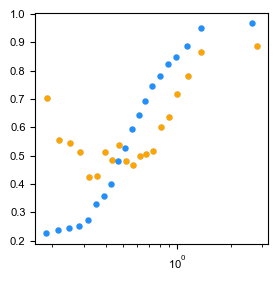

In [26]:
if mochi :
    plt.rcParams["figure.figsize"] = (3,3)

    ct = 0
    focal_idxs = [4, 5]
    colors = ['dodgerblue', 'orange']

    fig, ax = plt.subplots ()


    ct = 0
    for i in focal_idxs :
        ax.scatter ( (gammas[i,:-1] + gammas[i,1:])/2, tp[i,:] / tp_mochi[ct,:], zorder=nsims-i,
                      s=20,  color=colors[ct], edgecolor='black', linewidth=0.05,
                      label=labels[i])
        ct += 1
    ax.set_xscale ('log')

In [27]:
plt.rcParams["figure.figsize"] = (1.3,1.3)
#plt.rcParams["figure.figsize"] = (4,4)

focal_idxs = [0, 1,  4, 5]
colors = ['darkgray', 'lightgray', 'navy', 'dodgerblue']

fig, ax = plt.subplots ()
ct = 0
for i in focal_idxs :
    ax.scatter ( (gammas[i,:-1] + gammas[i,1:])/2, tp[i,:], zorder=nsims-i,
                  s=5,  color=colors[ct], edgecolor='black', linewidth=0.05,
                  label=labels[i])
    ct += 1

if mochi :
    for j in range (nmochi) :
        ax.scatter ( (gammas[j,:-1] + gammas[j,1:])/2, tp_mochi[j,:],
                     s=5,  marker='x', linewidth=.5, color=colors[2:][j])

ax.set_xscale ('log')
ax.set_ylim ( (-0.05,1.05) )
ax.set_ylabel ('true pos. rate', labelpad=0, fontsize=8)
ax.set_xlabel (r'$|\lambda_{ij}|$ midpoint', labelpad=0, fontsize=8)
legend1 = plt.legend (loc='upper left', frameon=False, fancybox=True, borderpad=0,
                      handletextpad=-.25, fontsize=6, bbox_to_anchor=(-0.05,1.))

handles = [mpl.lines.Line2D([0], [0], marker='o', color='k', label='R&R',
                          markerfacecolor='k', markersize=2, linewidth=0, linestyle=''),
           mpl.lines.Line2D([0], [0], marker='x', mew=.5, color='k', label='D+M',
                          markerfacecolor='k', markersize=2, linewidth=0, linestyle=''),
          ]

legend2 = mpl.legend.Legend(ax, handles=handles, labels=['R&R', 'D+M'],
                            handletextpad=-.25, frameon=False, fontsize=6, loc='lower right',
                            bbox_to_anchor=(1.05,0))

# Add the second legend manually to the Axes
ax.add_artist(legend2)

ax.tick_params (length=2, labelsize=6, pad=1)

if save :
    plt.savefig (os.path.join (outdir, 'compare_positive_rate.svg'),
                 format='svg', dpi=600, transparent=True, bbox_inches='tight')
    plt.close ()
else :
    plt.show ()

In [28]:
plt.rcParams["figure.figsize"] = (2,2)

focal_idxs = [0, 1, 2, 3, 4, 5]
colors = ['dimgray', 'lightgray', 'rosybrown', 'firebrick', 'navy', 'dodgerblue']
mochi_colors = ['navy','dodgerblue']

fig, ax = plt.subplots ()
ct = 0
for i in focal_idxs :
    ax.scatter ( (gammas[i,:-1] + gammas[i,1:])/2, tp[i,:], zorder=nsims-i,
                  s=10,  color=colors[ct], edgecolor='black', linewidth=0.05,
                  label=labels[i])
    ct += 1

if mochi :
    for j in range (nmochi) :
        ax.scatter ( (gammas[j,:-1] + gammas[j,1:])/2, tp_mochi[j,:],
                     s=10,  marker='x', linewidth=.5, color=mochi_colors[j])

ax.set_xscale ('log')
ax.set_ylim ( (-0.05,1.05) )
ax.set_ylabel ('true pos. rate', labelpad=0, fontsize=8)
ax.set_xlabel (r'$|\lambda_{ij}|$ midpoint', labelpad=0, fontsize=8)
legend1 = plt.legend (loc='upper left', frameon=False, fancybox=True, borderpad=0,
                      handletextpad=-.25, fontsize=6, bbox_to_anchor=(-.01,.98))

handles = [mpl.lines.Line2D([0], [0], marker='o', color='k', label='R&R',
                          markerfacecolor='k', markersize=2, linewidth=0, linestyle=''),
           mpl.lines.Line2D([0], [0], marker='x', mew=.5, color='k', label='D+M',
                          markerfacecolor='k', markersize=2, linewidth=0, linestyle=''),
          ]

legend2 = mpl.legend.Legend(ax, handles=handles, labels=['R&R', 'D+M'],
                            handletextpad=-.25, frameon=False, fontsize=6, loc='lower right',
                            bbox_to_anchor=(1.0,0))

# Add the second legend manually to the Axes
ax.add_artist(legend2)
ax.tick_params (length=2, labelsize=6, pad=1)

if save :
    plt.savefig (os.path.join (outdir, 'compare_positive_rate_all.pdf'),
                 format='pdf', dpi=600, transparent=True, bbox_inches='tight')
    plt.close ()
else :
    plt.show ()

In [29]:
# PLOT GP MAPS

plt.rcParams["figure.figsize"] = (1.9, 2)
plt.rcParams["figure.figsize"] = (1.7, 1.5)

#plt.rcParams["figure.figsize"] = (4, 2)

fig, axs = plt.subplots (2, 2, height_ratios=[1,2], sharex='col', sharey='row', constrained_layout=True)

ct = 0
for si in [0,4] :
    print (si)

    ysings = cp.deepcopy (y_sing_list[si])
    Ymat   = np.reshape (np.repeat (ysings, L), (L,L))
    Yij    = Ymat + np.transpose (Ymat)
    Yd     = cp.deepcopy (y_doub_list[si])
    
    lambda_singles = np.loadtxt (os.path.join (indir, seeds[si], 'sampled_single_lambdas.txt'))

    # compute lambda matrix
    Lambda_mat = np.reshape (np.repeat (lambda_singles, L), (L,L))
    Lij        = Lambda_mat + np.transpose (Lambda_mat) + imat_list[si] + 1.34
    
    #twinx = axs[ct].twinx ()
    myh = axs[0,ct].hist (-(lambda_singles+1.34), label=r'singles',
                          color='gray', edgecolor='black', linewidth=.05)

    myp = axs[1,ct].hexbin (-Lij[np.triu_indices (L, k=1)], y=Yd[np.triu_indices (L, k=1)],
                            yscale='log', cmap='Blues',
                            norm=mpl.colors.LogNorm (vmin=1, vmax=69237), gridsize=15, edgecolor='black',
                            linewidth=0, label='doubles')
    
    print (np.nanmax (myp.get_array()))

    axs[1,ct].axvline (-1.34, linestyle='--', linewidth=.5, color='black')
    axs[0,ct].axvline (-1.34, linestyle='--', linewidth=.5, color='black')

    axs[1,ct].set_xlabel (r'$\Lambda$', labelpad=2, fontsize=8)
    axs[1,ct].set_yscale ('log')
    axs[1,ct].tick_params (length=2, labelsize=6, pad=1)
    axs[0,ct].tick_params (length=2, labelsize=6, pad=1)

    minval = -np.round (np.nanmax (Lij) / 10) * 10
    maxval = -(np.round (np.nanmin (Lij) / 10) * 10)
    
    if ct == 0 :
        interval = 5
    else :
        interval = 10
    
    axs[1,ct].set_xticks ( np.arange (minval,maxval+1,interval),
                           np.array (np.arange (minval,maxval+1,interval), dtype=int))
    axs[0,ct].set_title (['Uniform', 'GB1-like'][ct], pad=3, fontsize=6)
    ct += 1
    
#cbar = fig.colorbar (myp, ax=axs[-1],  shrink=0.75, aspect=15, location='right')
#cbar.set_label ( r'Count',labelpad=2, fontsize=6)
#cbar.ax.tick_params (labelsize=6, pad=1, length=2)

axs[1,0].set_ylabel (r'$\hat Y_{ij}$', labelpad=-2, fontsize=8)
axs[0,0].set_ylabel ('Count', labelpad=0, fontsize=6)

if save :
    plt.savefig (os.path.join (outdir, 'fig3_a.svg'),
                 format='svg', transparent=True, dpi=600, bbox_inches='tight')
    plt.close ()
else :
    plt.show ()

0
61146.0
4
71191.0


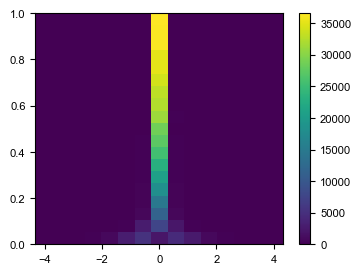

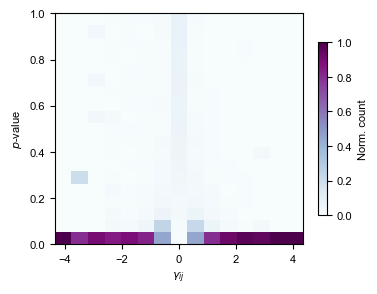

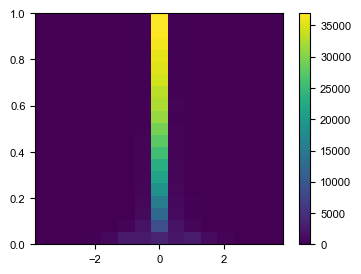

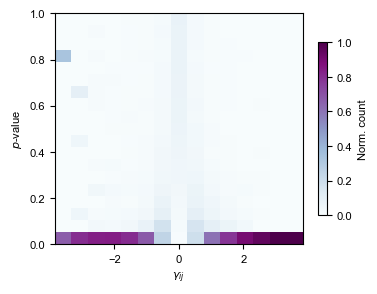

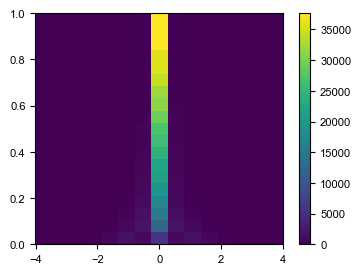

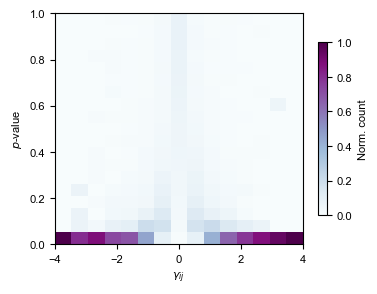

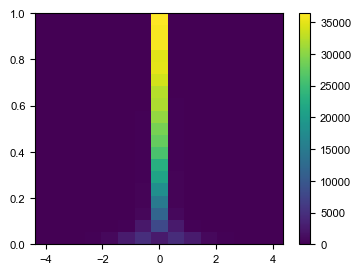

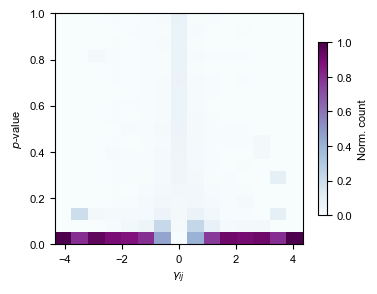

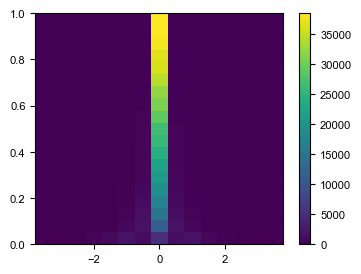

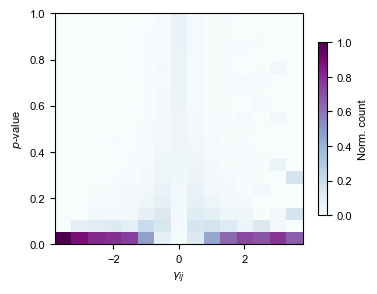

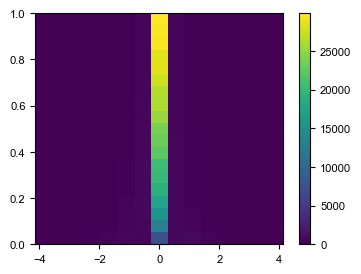

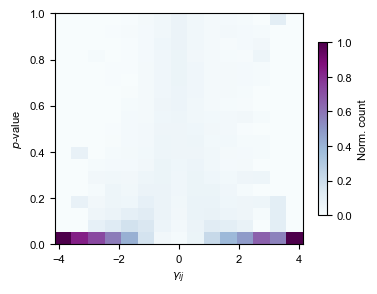

In [30]:
for i in range (nsims) :
    bigImat = cp.deepcopy (imat_list[i])
    Pvals   = cp.deepcopy (pval_list[i])
    
    maxival = np.nanmax (np.abs (bigImat))
    xbins = np.linspace (-maxival, maxival, 16)
    ybins = np.linspace (0, 1, 20)

    flativals = bigImat[np.tril_indices (L, k=-1)]
    flatpvals = Pvals[np.tril_indices (L, k=-1)]

    plt.rcParams["figure.figsize"] = (4,3)

    plt.hist2d (flativals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                flatpvals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                 bins=(xbins, ybins))

    plt.colorbar ()
    plt.show ()

    norm = 1
    hist, xedges, yedges = np.histogram2d ( flativals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                                            flatpvals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                                            bins=(xbins, ybins))
    hist = hist.T

    plt.rcParams["figure.figsize"] = (4,3)

    with np.errstate (divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= norm / hist.sum(axis=0, keepdims=True)

    plt.pcolormesh (xedges, yedges, hist, vmin=0, vmax=1, cmap='BuPu')
    plt.xlabel (r'$\gamma_{ij}$')

    plt.ylabel (r'$p$-value')
    plt.colorbar (shrink=0.75, label='Norm. count')
    plt.show ()
    #plt.savefig (os.path.join (indir, 'pvalues_true_gammas.pdf'), bbox_inches='tight')
    #plt.close ()

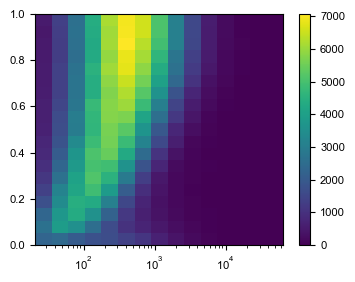

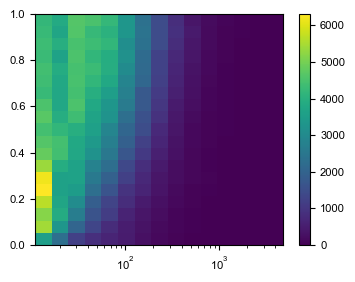

In [31]:
for i in [-2,-1] :
    bigImat = cp.deepcopy (n0_doub_list[i])
    Pvals   = cp.deepcopy (pval_list[i])
        
    maxival = np.nanmax (np.abs (bigImat))
    minival = np.nanmin (np.abs (bigImat))

    xbins   = np.logspace (np.log10 (minival), np.log10 (maxival), 16)
    ybins   = np.linspace (0, 1, 20)

    flativals = bigImat[np.tril_indices (L, k=-1)]
    flatpvals = Pvals[np.tril_indices (L, k=-1)]

    plt.rcParams["figure.figsize"] = (4,3)

    plt.hist2d (flativals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                flatpvals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                 bins=(xbins, ybins))

    plt.colorbar ()
    plt.xscale ('log')

    plt.show ()

    norm = 1
    hist, xedges, yedges = np.histogram2d ( flativals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                                            flatpvals[np.logical_and (~np.isnan (flativals), ~np.isnan (flatpvals))],
                                            bins=(xbins, ybins))
    hist = hist.T

    plt.rcParams["figure.figsize"] = (4,3)

    with np.errstate (divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= norm / hist.sum(axis=0, keepdims=True)

    plt.pcolormesh (xedges, yedges, hist, vmin=0, vmax=np.max (hist), cmap='BuPu')
    plt.xlabel (r'$N_{ij}^0$')
    
    plt.xscale ('log')

    plt.ylabel (r'$p$-value')
    plt.colorbar (shrink=0.75, label='Proportion')
    if save :
        plt.savefig (os.path.join (outdir, 'pvalues_n0_' + str (seeds[idx]) + '.pdf'), bbox_inches='tight')
        plt.close ()
    else :
        plt.show ()


In [32]:
mochi_thresholds

array([0.02873813, 0.05871766])

In [33]:
nbins = 15

af = .1

Ic = cp.deepcopy (imat_list[-1])
Yc = cp.deepcopy (y_doub_list[-1])
#bins  = np.logspace (np.log10 (np.nanmin (Yc)), np.log10 (np.nanmax (Yc)), nbins+1)
vals = cp.deepcopy (Yc[np.triu_indices (L, k=1)])
bins  = np.quantile ( vals[~np.isnan (vals)], np.linspace (0, 1, nbins+1))

fprate = np.zeros ((2, nbins))
tprate = np.zeros ((2, nbins))
for j in range (2) :
    if j == 0 :
        Ps = cp.deepcopy (pval_list[-1])
        #af = alpha
    else :
        Ps = cp.deepcopy (pval_mochi_list[-1])
        #af = mochi_thresholds[-1]
        
    vals = np.ndarray.flatten (Ps)
    af   = np.quantile (vals[~np.isnan (vals)], .1)

    for i in range (nbins) :
        Psub = cp.deepcopy (Ps)
        Psub[ np.logical_or (Yc < bins[i], Yc > bins[i+1]) ] = np.nan

        fprate[j,i] = np.sum (np.logical_and (Psub < af, Ic == 0))
        fprate[j,i] /= np.sum (np.logical_and (~np.isnan (Psub), Ic == 0))
        tprate[j,i] = np.sum (np.logical_and (Psub < af, np.abs (Ic) > 0))
        tprate[j,i] /= np.sum ( np.logical_and (~np.isnan (Psub), np.abs (Ic) > 0) )

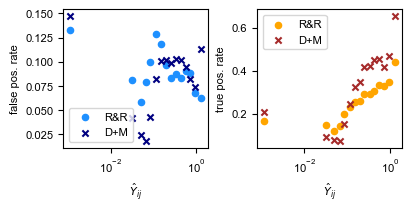

In [34]:
plt.rcParams["figure.figsize"] = (4,2)

fig, axs = plt.subplots (1,2,sharex=True, constrained_layout=True)

for i in range (2) :
    axs[0].scatter (bins[:-1], fprate[i,:],
                    s=20, marker=['o','x'][i], color=['dodgerblue','navy'][i], label=['R&R','D+M'][i])
    axs[1].scatter (bins[:-1], tprate[i,:],
                    s=20, marker=['o','x'][i], color=['orange','brown'][i], label=['R&R','D+M'][i])

for i in range (2) :
    axs[i].set_ylabel (['false ', 'true '][i] + 'pos. rate')
    axs[i].legend ()
    axs[i].set_xlabel (r'$\hat Y_{ij}$')
    
plt.xscale ('log')
#plt.yscale ('log')


plt.show ()

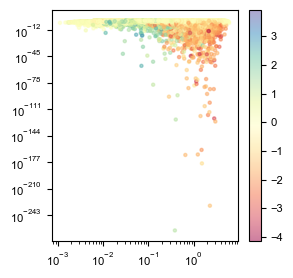

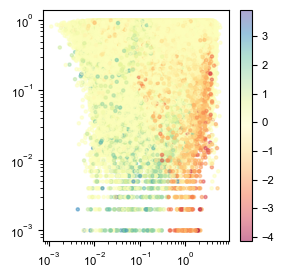

In [35]:
plt.rcParams["figure.figsize"] = (3,3)

plt.scatter (y_doub_list[-1][np.triu_indices (L, k=1)],
             pval_mochi_list[-1][np.triu_indices (L, k=1)],
             s=5, alpha=0.5, c=imat_list[-1][np.triu_indices (L, k=1)],
             cmap='Spectral')
plt.colorbar ()
plt.xscale ('log')
plt.yscale ('log')
plt.show ()

plt.scatter (y_doub_list[-1][np.triu_indices (L, k=1)],
             pval_list[-1][np.triu_indices (L, k=1)],
             s=5, alpha=0.5, c=imat_list[-1][np.triu_indices (L, k=1)],
             cmap='Spectral')
plt.colorbar ()
plt.xscale ('log')
plt.yscale ('log')

In [36]:
# MAKE COLORBARS
orient = 'vertical'
cloc   = 'right'

# false positives
plt.rcParams["figure.figsize"] = (1.5, 1.25)

fig, axs = plt.subplots ()

xs = np.linspace (0,1,10)
hm = axs.scatter (xs, xs, c=xs, cmap='rocket_r', vmin=0, vmax=.54)
cbar = fig.colorbar (hm, ax=axs, shrink=.7, #ticks=np.linspace(0,1,5),
                     location=cloc, orientation=orient, aspect=15)
cbar.set_label (r'pseudo-$tpr$', size=8, labelpad=5)
cbar.ax.tick_params (labelsize=6, length=3, pad=.5)
#cbar.ax.set_xticklabels(np.linspace (0,1,5)) 

if save :
    plt.savefig (os.path.join (outdir, 'colorbar_tpr.svg'),
                 format='svg', bbox_inches='tight', dpi=600)
    plt.close ()
else :
    plt.show ()

# contacts
fig, axs = plt.subplots ()

hm = axs.scatter (xs, xs, c=xs, cmap='gray_r', vmin=0, vmax=1) 
cbar = fig.colorbar (hm, ax=axs, shrink=.7, ticks=np.linspace(0,1,5),
                     location='top', orientation='horizontal', aspect=15)
cbar.set_label (r'prop. contacts', size=8, labelpad=5)
cbar.ax.tick_params (labelsize=6, length=3, pad=.5)
cbar.ax.set_xticklabels(np.linspace (0,1,5)) 

if save :
    plt.savefig (os.path.join (outdir, 'colorbar_contacts.svg'),
                 format='svg', bbox_inches='tight', dpi=600)
    plt.close ()
else :
    plt.show ()
    
# pseudo fpr
fig, axs = plt.subplots ()

hm = axs.scatter (xs, xs, c=xs, cmap='Blues', vmin=0, vmax=.11)
cbar = fig.colorbar (hm, ax=axs, shrink=.7, ticks=np.arange (0,4,1)*.05,
                     location='top', orientation='horizontal', aspect=15)
cbar.set_label (r'pseudo-$fpr$', size=8, labelpad=5)
cbar.ax.tick_params (labelsize=6, length=3, pad=.5)
cbar.ax.set_xticklabels( np.round (np.arange (0,4,1)*.05,2)) 

if save :
    plt.savefig (os.path.join (outdir, 'colorbar_fpr.svg'),
                 format='svg', bbox_inches='tight', dpi=600)
    plt.close ()
else :
    plt.show ()
    
        
# pseudo fpr
fig, axs = plt.subplots ()

hm   = axs.scatter (xs, xs, c=xs, cmap='Spectral', vmin=-1, vmax=1)
cbar = fig.colorbar (hm, ax=axs, shrink=.7, ticks=np.linspace (-1,1,5),
                     location='top', orientation='horizontal', aspect=15)
cbar.set_label (r'pseudo-$fpr$', size=8, labelpad=5)
cbar.ax.tick_params (labelsize=6, length=3, pad=.5)
cbar.ax.set_xticklabels( np.round (np.linspace (-1,1,5),2)) 

if save :
    plt.savefig (os.path.join (outdir, 'colorbar_sign.svg'),
                 format='svg', bbox_inches='tight', dpi=600)
    plt.close ()
else :
    plt.show ()

In [37]:
mochi_thresholds

array([0.02873813, 0.05871766])